<a href="https://colab.research.google.com/github/gsheara/Seattle-Weather/blob/main/GS_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Set-up and Importing Data**

This Colab notebook is for preparing two datasets on percipitation in Seattle and New York respectively. The following code imports libraries such as pandas and numpy which are used for manipulating and visualizing said data. I chose to import Altair because it's the library I have the most experience with for making charts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno
import altair as alt

The following code block imports the CSV files containing the raw data from my GitHub repository and names each data frame.

In [2]:
df_ny_raw = pd.read_csv('https://raw.githubusercontent.com/gsheara/Seattle-Weather/main/ny_rain.csv')
df_sea_raw = pd.read_csv('https://raw.githubusercontent.com/gsheara/Seattle-Weather/main/seattle_rain.csv')

The following blocks of code do some initial data exploration, looking at the first few rows of each dataframe and some descriptive statistics.

In [3]:
df_ny_raw.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


In [ ]:
df_sea_raw.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [ ]:
df_ny_raw.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,17465.000000,17465.000000,17465.000000,155.000000,151.000000,17275.000000,11508.000000,6318.000000,0.0,0.0
mean,40.826103,-73.697762,48.792551,5.187097,0.835695,0.136644,0.043483,0.255033,NaN,NaN
std,0.189215,0.210564,46.087915,5.581494,1.253480,0.396871,0.520562,1.465410,NaN,NaN
min,40.615654,-74.145561,2.100000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,40.668899,-73.823290,4.300000,2.000000,0.070000,0.000000,0.000000,0.000000,NaN,NaN
50%,40.758947,-73.710999,42.700000,3.000000,0.390000,0.000000,0.000000,0.000000,NaN,NaN
75%,41.091681,-73.505371,91.700000,5.000000,1.010000,0.060000,0.000000,0.000000,NaN,NaN
max,41.150120,-73.358045,175.000000,42.000000,7.000000,9.450000,16.000000,18.000000,NaN,NaN


In [ ]:
df_sea_raw.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


In [ ]:
df_ny_raw.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [4]:
df_ny_raw['NAME'].unique()
df_sea_raw['NAME'].unique()

array(['SEATTLE 4.5 N, WA US', 'SEATTLE 6.5 SSW, WA US',
       'SEATTLE 3.9 SSW, WA US', 'SEATTLE 4.2 N, WA US',
       'SEATTLE 5.6 N, WA US', 'SEATTLE 2.1 ESE, WA US',
       'SEATTLE TACOMA AIRPORT, WA US', 'SEATTLE 5.8 SSE, WA US',
       'SEATTLE 5.5 NNE, WA US', 'SEATTLE 2.5 SE, WA US'], dtype=object)


Based on these outputs, we can see a large number of NaN values in certain columns (notably DASF and MDSF). Since we're focusing on rainfall, we can limit our columns to include only percipitation. Because the count of values in the percipitation column is less than that of the latitude, longitude, or elevation columns in both data frames, we know that there is also missing data in those columns. Looking at the list of data types, the DATE column is listed as a Python object, which we can convert to a date-time type to be more specific and work better when we visualize our data. Finally, we can also rename our columns to make them more legible.

##**Cleaning dataframe, addressing missing values**

To address the problems we've identified, the first and simplest step can be to convert the DATE column to a date-time type. I'll also check that the dates are being read correctly by doing a quick visualization with that column for each dataframe.

In [5]:
df_ny_raw['DATE'] = pd.to_datetime(df_ny_raw['DATE'])
df_sea_raw['DATE'] = pd.to_datetime(df_sea_raw['DATE'])

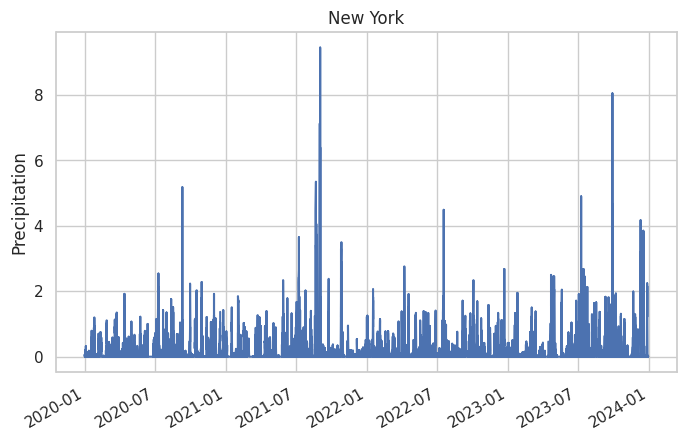

In [6]:
fig, ax = plt.subplots()
ax.plot(df_ny_raw['DATE'], df_ny_raw['PRCP'])
ax.set_ylabel('Precipitation')
ax.set_title('New York')
fig.autofmt_xdate()
fig.set_size_inches(8, 5)

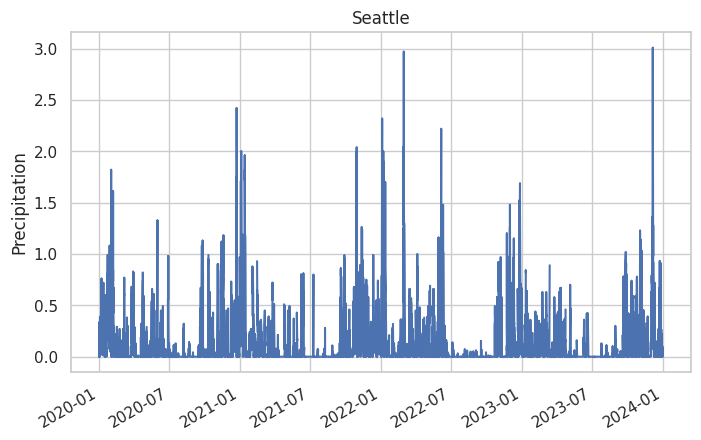

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_sea_raw['DATE'], df_sea_raw['PRCP'])
ax.set_ylabel('Precipitation')
ax.set_title('Seattle')
fig.autofmt_xdate()
fig.set_size_inches(8, 5)

Based on these charts, we can observe that 1. the data is being correctly processed as a date value, and 2. the New York data frame is already demonstrating much higher precipitation values than the Seattle dataframe (based on the scale of the y-axis being 8 versus 3 respectively.)

The next step for cleaning our data will be to remove any unnencessary columns. Because we are focusing on rainfall, I have decided to only keep percipitation, date, and city values. To do this, I create a list of "bad" columns to be dropped from the dataframes. To confirm that the drop was completed correctly, I'll take a look again at the first few rows of each dataframe.

In [7]:
bad_cols = ['ELEVATION', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'DASF', 'MDSF']
df_sea = df_sea_raw.drop(columns=bad_cols)
df_ny = df_ny_raw.drop(columns=bad_cols)

In [ ]:
df_sea.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,2020-01-01,0.19
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,2020-01-01,0.23
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-01-01,0.19
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-01,0.13
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,2020-01-01,0.22


In [ ]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,2020-01-01,0.00
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,2020-01-01,0.06
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,2020-01-01,0.00
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,2020-01-01,0.00
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,2020-01-01,0.00


Next, I wanted to check for any bad data within the columns I had narrowed down to. This includes not only the missing values that we noticed before, but also checking for any duplicate entries. By examining the source file, I could see that each weather station only had one row per day, so I decided to create a new dataframe for each city that excluded the duplicates.

In [8]:
ny_unique = df_ny.drop_duplicates()
sea_unique = df_sea.drop_duplicates()

Next, I used the built-in pandas interpolate function to fill in any NaN values left in the PRCP columns for each city's data set.

In [9]:
ny_unique.interpolate()
sea_unique.interpolate()

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,2020-01-01,0.19
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,2020-01-01,0.23
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-01-01,0.19
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-01,0.13
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,2020-01-01,0.22
...,...,...,...,...,...,...
6998,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.444670,-122.314420,2023-12-30,0.10
6999,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2023-12-31,0.06
7000,US1WAKG0229,"SEATTLE 5.5 NNE, WA US",47.696532,-122.312907,2023-12-31,0.06
7001,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",47.611700,-122.308500,2023-12-31,0.08


Based on my work in the previous section, I've now done the bulk of the cleaning for this data: correcting data types, dropping unnecessary columns, checking for and removing duplicate rows, and fixing missing data by interpolating any NaN values.

##**Finalizing data frame**

Finally, I wanted to sort the data into one frame by concatinating and then melting it together. After exploring these functions a bit, I decided it would be best to focus on two equivalent weather stations from each city and then join on the dates for each weather station, given that a weather station records a value once a day. I also needed to do some final tweaks like fixing the column names to be more legible.

I selected a weatherstation located near an airport at each city, hoping that the data would be similar and collected with similar precision.

In [10]:
df_seatac = sea_unique.loc[sea_unique["NAME"] == "SEATTLE TACOMA AIRPORT, WA US"]
df_jfk = ny_unique.loc[ny_unique["NAME"] == "JFK INTERNATIONAL AIRPORT, NY US"]

After creating a frame for the airports, I merged them on the date.

In [11]:
df_merge = df_jfk.merge(df_seatac, on='DATE', how='left')
df_merge.head()

,STATION_x,NAME_x,LATITUDE_x,LONGITUDE_x,DATE,PRCP_x,STATION_y,NAME_y,LATITUDE_y,LONGITUDE_y,PRCP_y
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-01,0.00,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.00
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-02,0.00,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.21
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-03,0.13,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.39
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-04,0.16,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.10
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2020-01-05,0.00,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.14


After that, the data sets can then be tidied up into a long format. I decided to drop the latitude and longitude data, since that can be observed form the station alone, and the name since that can be determined from whether it's X or Y percipitation. Then, I made the aforementioned tweaks to the column names and city value names.

In [12]:
df_prcp = df_merge.drop(columns=['STATION_x', 'LATITUDE_x', 'LONGITUDE_x', 'STATION_y', 'LATITUDE_y', 'LONGITUDE_y', 'NAME_x', 'NAME_y'])
df_tidy = pd.melt(df_prcp, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')
df_tidy.tail()

,DATE,CITY,PRCP
2917,2023-12-27,PRCP_y,0.1
2918,2023-12-28,PRCP_y,NaN
2919,2023-12-29,PRCP_y,0.0
2920,2023-12-30,PRCP_y,0.1
2921,2023-12-31,PRCP_y,0.0


In [13]:
df_tidy.loc[df_tidy['CITY']=='PRCP_x', 'CITY'] = 'NYC'
df_tidy.loc[df_tidy['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [14]:
mapping_dict = {'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'}
df = df_tidy.rename(columns=mapping_dict)
df.head()

,date,city,precipitation
0,2020-01-01,NYC,0.00
1,2020-01-02,NYC,0.00
2,2020-01-03,NYC,0.13
3,2020-01-04,NYC,0.16
4,2020-01-05,NYC,0.00


This final output is the product of all of the previous steps to make the data as easy to use and understand as possible. While we have dropped the bulk of the data, such as the other weather stations, narrowing our focus will help make a more accurate comparison between the two cities, given that there are more weather stations in New York and therefore a higher number of observations.

##**Additional useful things**

Finally, I added some descriptive variables and exported the CSV so it could be uploaded to GitHub.

In [15]:
df.groupby('city').describe()

date                                                                 \
     count                 mean                  min                  25%   
city                                                                        
NYC   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   
SEA   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   

                                                                          \
                      50%                  75%                  max  std   
city                                                                       
NYC   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   
SEA   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   

     precipitation                                                
             count      mean  min  25%  50%   75%   max      std  
city                                                              
NYC         1461.0  0.118207  0.0  0.0  0.0  0.05  8.05  0.35926  
SEA         1229.0  0.109138  0.0  0.0  0.0  0.11  2.97  0.25036

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2922 non-null   datetime64[ns]
 1   city           2922 non-null   object        
 2   precipitation  2690 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ KB


In [17]:
df.to_csv('Seattle-Weather-clean.csv', index=False)